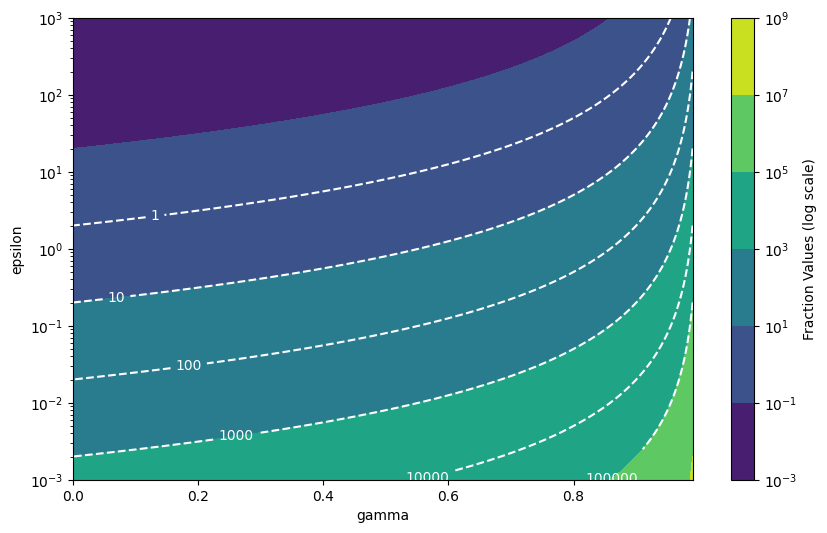

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Define the ranges for gamma and epsilon
gamma_values = np.linspace(0, 0.99, 10000)  # Avoiding 1 to prevent division by zero
epsilon_values = np.logspace(-3, 3, 10000)

# Create a meshgrid for gamma and epsilon
gamma, epsilon = np.meshgrid(gamma_values, epsilon_values)

# Calculate the function values
fraction_values = 2 / ((1 - gamma)**2 * epsilon)

# Plotting the results
plt.figure(figsize=(10, 6))
cp = plt.contourf(gamma, epsilon, fraction_values, levels=50, cmap='viridis', norm=LogNorm())
cbar = plt.colorbar(cp)
cbar.set_label('Fraction Values (log scale)')
contour_lines = plt.contour(gamma, epsilon, fraction_values, levels=[1, 10, 100, 1000, 10000, 100000], colors='white', linestyles='dashed')
plt.clabel(contour_lines, fmt='%1.0f', colors='white')

# Add the LaTeX formula in the title of the plot
#plt.title(r'Contour Plot of the Theoretical Iteration Complexity\nfor the Policy Gradient + Log Barrier Regularization, Softmax Parameterization $\mathcal{O} \left( \frac{D^2 |\mathcal{S}|^2 |\mathcal{A}|^2}{(1 - \gamma)^6 \epsilon^2} \right)$')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.yscale('log')
plt.show()


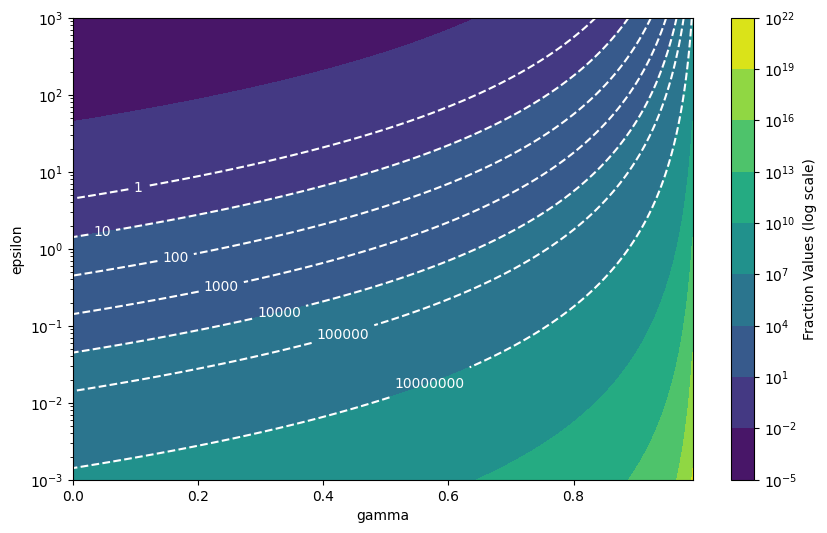

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Define the ranges for gamma and epsilon
gamma_values = np.linspace(0, 0.99, 10000)  # Avoiding 1 to prevent division by zero
epsilon_values = np.logspace(-3, 3, 10000)
S = 10
A = 2
D_inf = 1

# Create a meshgrid for gamma and epsilon
gamma, epsilon = np.meshgrid(gamma_values, epsilon_values)

# Calculate the function values
fraction_values = (D_inf**2 * S * A) / ((1 - gamma)**6 * epsilon**2)

# Plotting the results
plt.figure(figsize=(10, 6))
cp = plt.contourf(gamma, epsilon, fraction_values, levels=50, cmap='viridis', norm=LogNorm())
cbar = plt.colorbar(cp)
cbar.set_label('Fraction Values (log scale)')
contour_lines = plt.contour(gamma, epsilon, fraction_values, levels=[1, 10, 100, 1000, 10000, 100000, 1e7], colors='white', linestyles='dashed')
plt.clabel(contour_lines, fmt='%1.0f', colors='white')

# Add the LaTeX formula in the title of the plot
#plt.title(r'Contour Plot of the Theoretical Iteration Complexity\nfor the Policy Gradient + Log Barrier Regularization, Softmax Parameterization $\mathcal{O} \left( \frac{D^2 |\mathcal{S}|^2 |\mathcal{A}|^2}{(1 - \gamma)^6 \epsilon^2} \right)$')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.yscale('log')
plt.show()


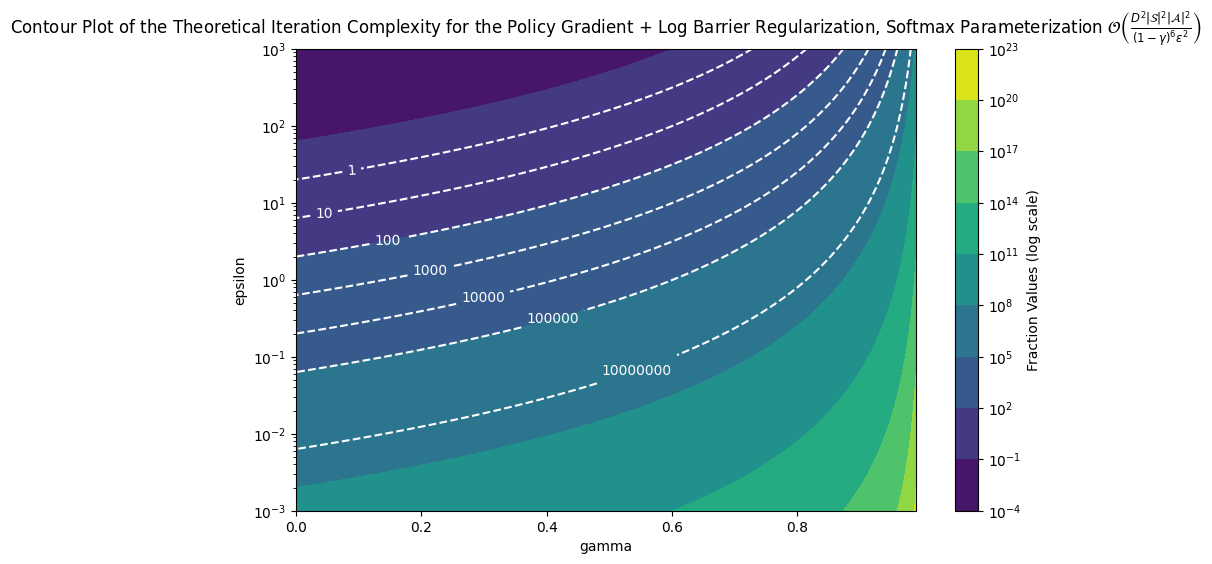

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Define the ranges for gamma and epsilon
gamma_values = np.linspace(0, 0.99, 10000)  # Avoiding 1 to prevent division by zero
epsilon_values = np.logspace(-3, 3, 10000)
S = 10
A = 2
D_inf = 1

# Create a meshgrid for gamma and epsilon
gamma, epsilon = np.meshgrid(gamma_values, epsilon_values)

# Calculate the function values
fraction_values = (D_inf**2 * S**2 * A**2) / ((1 - gamma)**6 * epsilon**2)

# Plotting the results
plt.figure(figsize=(10, 6))
cp = plt.contourf(gamma, epsilon, fraction_values, levels=50, cmap='viridis', norm=LogNorm())
cbar = plt.colorbar(cp)
cbar.set_label('Fraction Values (log scale)')
contour_lines = plt.contour(gamma, epsilon, fraction_values, levels=[1, 10, 100, 1000, 10000, 100000, 1e7], colors='white', linestyles='dashed')
plt.clabel(contour_lines, fmt='%1.0f', colors='white')

# Add the LaTeX formula in the title of the plot
plt.title(r'Contour Plot of the Theoretical Iteration Complexity for the Policy Gradient + Log Barrier Regularization, Softmax Parameterization $\mathcal{O} \left( \frac{D^2 |\mathcal{S}|^2 |\mathcal{A}|^2}{(1 - \gamma)^6 \epsilon^2} \right)$')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.yscale('log')
plt.show()


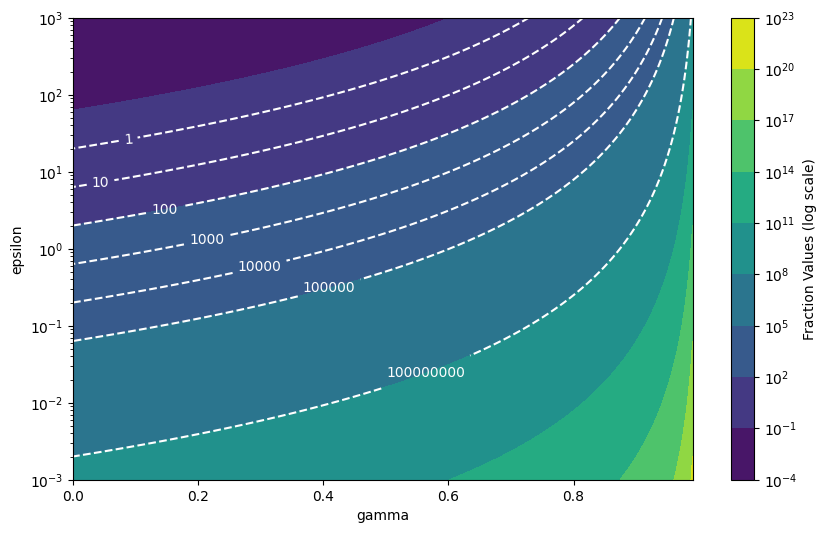

In [30]:
# Plotting the results
plt.figure(figsize=(10, 6))
cp = plt.contourf(gamma, epsilon, fraction_values, levels=50, cmap='viridis', norm=LogNorm())
cbar = plt.colorbar(cp)
cbar.set_label('Fraction Values (log scale)')
contour_lines = plt.contour(gamma, epsilon, fraction_values, levels=[1, 10, 100, 1000, 10000, 100000, 1e8], colors='white', linestyles='dashed')
plt.clabel(contour_lines, fmt='%1.0f', colors='white')

# Add the LaTeX formula in the title of the plot
#plt.title(r'Contour Plot of the Theoretical Iteration Complexity\nfor the Policy Gradient + Log Barrier Regularization, Softmax Parameterization $\mathcal{O} \left( \frac{D^2 |\mathcal{S}|^2 |\mathcal{A}|^2}{(1 - \gamma)^6 \epsilon^2} \right)$')
plt.xlabel('gamma')
plt.ylabel('epsilon')
plt.yscale('log')
plt.show()

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to calculate theoretical values
def theoretical_iterations_npg(gamma, epsilon):
    return 2 / ((1 - gamma)**2 * epsilon)

# Generate a range of values for gamma and epsilon
gamma_values = np.array([0.1, 0.2, 0.5, 0.8, 0.9])
epsilon_values = np.logspace(-3, 0, 4)  # 10 values from 1e-3 to 1e3

# Create a DataFrame to hold the data
data = {
    'gamma': [],
    'epsilon': [],
    'empirical': [],
    'theoretical': []
}

# Populate the DataFrame with all combinations of gamma and epsilon
for gamma in gamma_values:
    for epsilon in epsilon_values:
        theoretical_value = theoretical_iterations_npg(gamma, epsilon)
        
        data['gamma'].append(gamma)
        data['epsilon'].append(epsilon)
        data['theoretical'].append(theoretical_value)

df = pd.DataFrame(data)

# Pivot the dataframe to get matrix formats suitable for heatmaps
empirical_data = df.pivot(index='gamma', columns='epsilon', values='empirical')
theoretical_data = df.pivot(index='gamma', columns='epsilon', values='theoretical')
difference_data = empirical_data - theoretical_data

# Plotting the heatmaps
plt.figure(figsize=(18, 6))

# Empirical values heatmap
plt.subplot(1, 3, 1)
sns.heatmap(empirical_data, annot=True, fmt=".2f", cmap='viridis')
plt.title('Empirical Values')
plt.xlabel('Epsilon')
plt.ylabel('Gamma')

# Theoretical values heatmap
plt.subplot(1, 3, 2)
sns.heatmap(theoretical_data, annot=True, fmt=".2f", cmap='viridis')
plt.title('Theoretical Values')
plt.xlabel('Epsilon')
plt.ylabel('Gamma')

# Difference heatmap
plt.subplot(1, 3, 3)
sns.heatmap(difference_data, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Difference (Empirical - Theoretical)')
plt.xlabel('Epsilon')
plt.ylabel('Gamma')

plt.tight_layout()
plt.show()


ValueError: All arrays must be of the same length

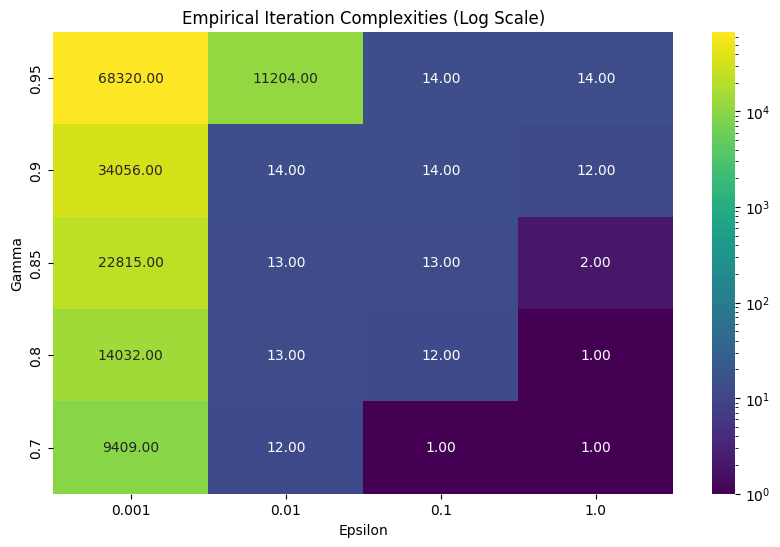

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm, LinearSegmentedColormap

# Function to calculate theoretical values
def theoretical_iterations_npg(gamma, epsilon):
    return 2 / ((1 - gamma)**2 * epsilon)

# Provided empirical values
empirical_values = {(0.7, 0.001): 9409,
 (0.7, 0.01): 12,
 (0.7, 0.1): 1,
 (0.7, 1.0): 1,
 (0.8, 0.001): 14032,
 (0.8, 0.01): 13,
 (0.8, 0.1): 12,
 (0.8, 1.0): 1,
 (0.85, 0.001): 22815,
 (0.85, 0.01): 13,
 (0.85, 0.1): 13,
 (0.85, 1.0): 2,
 (0.9, 0.001): 34056,
 (0.9, 0.01): 14,
 (0.9, 0.1): 14,
 (0.9, 1.0): 12,
 (0.95, 0.001): 68320,
 (0.95, 0.01): 11204,
 (0.95, 0.1): 14,
 (0.95, 1.0): 14,
}

# Generate a range of values for gamma and epsilon
gamma_values = [0.7, 0.8, 0.85, 0.9, 0.95]  # Specific values provided
epsilon_values = [0.001, 0.01, 0.1, 1.0]  # Specific values provided

# Create a DataFrame to hold the data
data = {
    'gamma': [],
    'epsilon': [],
    'empirical': [],
    'theoretical': []
}

# Populate the DataFrame with all combinations of gamma and epsilon
for gamma in gamma_values:
    for epsilon in epsilon_values:
        empirical_value = empirical_values.get((gamma, epsilon), np.nan)
        theoretical_value = theoretical_iterations_npg(gamma, epsilon)
        
        data['gamma'].append(gamma)
        data['epsilon'].append(epsilon)
        data['empirical'].append(empirical_value)
        data['theoretical'].append(theoretical_value)

df = pd.DataFrame(data)

# Pivot the dataframe to get matrix formats suitable for heatmaps
empirical_data = df.pivot(index='gamma', columns='epsilon', values='empirical')
theoretical_data = df.pivot(index='gamma', columns='epsilon', values='theoretical')
difference_data = empirical_data - theoretical_data
difference_percentage_data = (1-abs(difference_data / theoretical_data)) * 100

# Define a custom colormap from cardinal red to green
colors = [(0.94, 0.19, 0.22), (0.0, 0.5, 0.0)]  # cardinal red to green
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'red_to_green'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the heatmaps
plt.figure(figsize=(10, 6))

# Empirical values heatmap
sns.heatmap(empirical_data, annot=True, fmt=".2f", cmap='viridis', norm=LogNorm())
plt.title('Empirical Iteration Complexities (Log Scale)')
plt.xlabel('Epsilon')
plt.ylabel('Gamma')
plt.gca().invert_yaxis()

# Theoretical values heatmap
#plt.subplot(1, 3, 2)
#sns.heatmap(theoretical_data, annot=True, fmt=".2f", cmap='viridis', norm=LogNorm())
#plt.title('Theoretical Values (Log Scale)')
#plt.xlabel('Epsilon')
#plt.ylabel('Gamma')
#plt.gca().invert_yaxis()

plt.show()


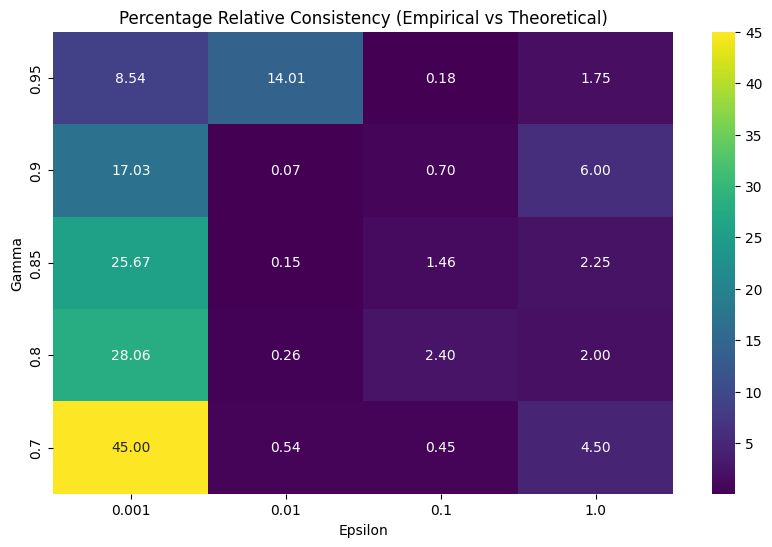

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(difference_percentage_data, annot=True, fmt=".2f", cmap='viridis')
plt.title('Percentage Relative Consistency (Empirical vs Theoretical)')
plt.xlabel('Epsilon')
plt.ylabel('Gamma')
plt.gca().invert_yaxis()

plt.show()

{(10, 0.4): 15,
 (10, 0.6): 14,
 (10, 0.7): 14,
 (10, 0.8): 14,
 (20, 0.4): 15,
 (20, 0.6): 14,
 (20, 0.7): 14,
 (20, 0.8): 14,
 (40, 0.4): 1,
 (40, 0.6): 1,
 (40, 0.7): 8,
 (40, 0.8): 12,
 (100, 0.4): 1,
 (100, 0.6): 1,
 (100, 0.7): 1,
 (100, 0.8): 1}

epsilon      0.4      0.6      0.7      0.8      0.9
gamma                                               
2       -19985.0 -19986.0 -19987.0 -19987.0 -19987.0
4       -19985.0 -19986.0 -19986.0 -19986.0 -19986.0
10      -19985.0 -19986.0 -19986.0 -19986.0 -19986.0
20      -19985.0 -19986.0 -19986.0 -19986.0 -19986.0
40      -19999.0 -19999.0 -19992.0 -19988.0 -19987.0
epsilon      0.4      0.6      0.7      0.8      0.9
gamma                                               
2        20000.0  20000.0  20000.0  20000.0  20000.0
4        20000.0  20000.0  20000.0  20000.0  20000.0
10       20000.0  20000.0  20000.0  20000.0  20000.0
20       20000.0  20000.0  20000.0  20000.0  20000.0
40       20000.0  20000.0  20000.0  20000.0  20000.0


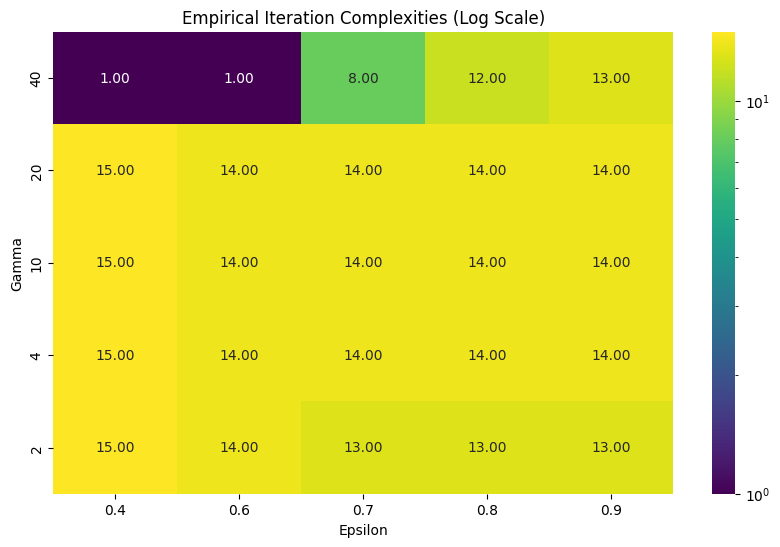

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm, LinearSegmentedColormap

# Function to calculate theoretical values
def theoretical_iterations_npg(gamma, epsilon):
    return 2 / ((1 - gamma)**2 * epsilon)

# Provided empirical values
empirical_values = {(2, 0.4): 15,
 (2, 0.6): 14,
 (2, 0.7): 13,
 (2, 0.8): 13,
 (2, 0.9): 13,
 (4, 0.4): 15,
 (4, 0.6): 14,
 (4, 0.7): 14,
 (4, 0.8): 14,
 (4, 0.9): 14,
 (10, 0.4): 15,
 (10, 0.6): 14,
 (10, 0.7): 14,
 (10, 0.8): 14,
 (10, 0.9): 14,
 (20, 0.4): 15,
 (20, 0.6): 14,
 (20, 0.7): 14,
 (20, 0.8): 14,
 (20, 0.9): 14,
 (40, 0.4): 1,
 (40, 0.6): 1,
 (40, 0.7): 8,
 (40, 0.8): 12,
 (40, 0.9): 13}

# Generate a range of values for gamma and epsilon
gamma_values = [2, 4, 10, 20, 40] # Specific values provided
epsilon_values = [0.4, 0.6, 0.7, 0.8, 0.9]  # Specific values provided

# Create a DataFrame to hold the data
data = {
    'gamma': [],
    'epsilon': [],
    'empirical': [],
    'theoretical': []
}

# Populate the DataFrame with all combinations of gamma and epsilon
for gamma in gamma_values:
    for epsilon in epsilon_values:
        empirical_value = empirical_values.get((gamma, epsilon), np.nan)
        theoretical_value = theoretical_iterations_npg(0.9, 0.01)
        
        data['gamma'].append(gamma)
        data['epsilon'].append(epsilon)
        data['empirical'].append(empirical_value)
        data['theoretical'].append(theoretical_value)

df = pd.DataFrame(data)

# Pivot the dataframe to get matrix formats suitable for heatmaps
empirical_data = df.pivot(index='gamma', columns='epsilon', values='empirical')
theoretical_data = df.pivot(index='gamma', columns='epsilon', values='theoretical')
difference_data = empirical_data - theoretical_data
print(difference_data)
print(theoretical_data)
difference_percentage_data = (1-abs(difference_data / theoretical_data)) * 100

# Define a custom colormap from cardinal red to green
colors = [(0.94, 0.19, 0.22), (0.0, 0.5, 0.0)]  # cardinal red to green
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'red_to_green'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the heatmaps
plt.figure(figsize=(10, 6))

# Empirical values heatmap
sns.heatmap(empirical_data, annot=True, fmt=".2f", cmap='viridis', norm=LogNorm())
plt.title('Empirical Iteration Complexities (Log Scale)')
plt.xlabel('Epsilon')
plt.ylabel('Gamma')
plt.gca().invert_yaxis()

# Theoretical values heatmap
#plt.subplot(1, 3, 2)
#sns.heatmap(theoretical_data, annot=True, fmt=".2f", cmap='viridis', norm=LogNorm())
#plt.title('Theoretical Values (Log Scale)')
#plt.xlabel('Epsilon')
#plt.ylabel('Gamma')
#plt.gca().invert_yaxis()

plt.show()


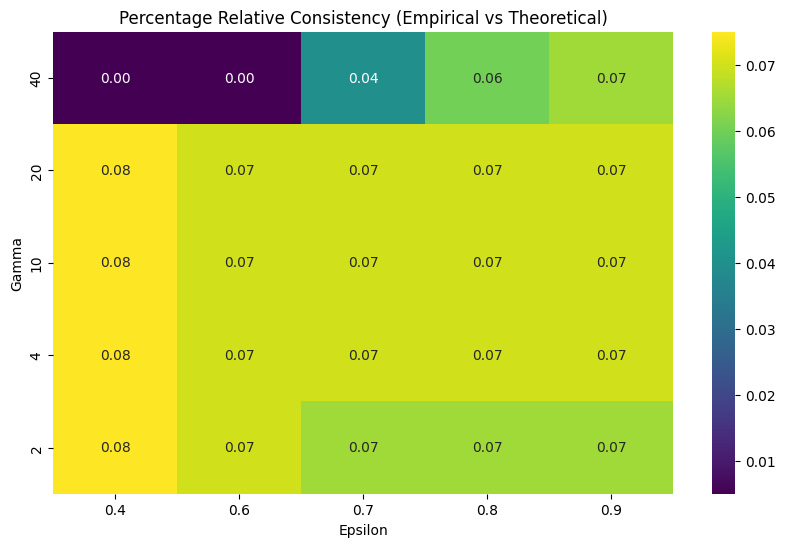

In [63]:
plt.figure(figsize=(10, 6))
sns.heatmap(difference_percentage_data, annot=True, fmt=".2f", cmap='viridis')
plt.title('Percentage Relative Consistency (Empirical vs Theoretical)')
plt.xlabel('Epsilon')
plt.ylabel('Gamma')
plt.gca().invert_yaxis()

plt.show()